In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import random
from random import randrange

In [13]:
methods_dict = {1:"Missing_Data", 2:"Outliers", 3:"Labeling_Errors", 4:"Feature_Noise"} 
def data_corruption(method, data, labels, corrupt_p):
    corruption_method = methods_dict[method]
    if corrupt_p <= 0 or corrupt_p >= 1:
        print("Please choose a valid value for the corruption parameter (positive, above 0 and less than 1.)")
        return None
    
    
    # Go through each image, and create a randomized mask which sets pixels to a value of 0.
    data_corrupted = []
    if corruption_method == "Missing_Data":
        for image in data:
            mask = np.zeros(image.shape[0], dtype=int)
            mask[int(image.shape[0]*corrupt_p):] = 1
            random.shuffle(mask)
            mask = mask.astype(bool)
            corrupted_image = np.where(mask == False, 0, image)
            data_corrupted.append(corrupted_image)
        
        return data_corrupted
    
    if corruption_method == "Outliers":
        print("not yet implemented")
        
    if corruption_method == "Labeling_Errors":
        if len(labels) > 0:
            mask = np.zeros(len(labels), dtype=int)
            mask[int(len(labels)*corrupt_p):] = 1
            random.shuffle(mask)
            mask = mask.astype(bool)
            corrupted_labels = np.where(mask == False, "needs_change", labels)
            for i in range(len(labels)):
                if corrupted_labels[i] == "needs_change":
                    options = np.delete(name, np.where(np.unique(labels) == labels[i])) ## Using np.unique to find the set of labels.
                    corrupted_labels[i] = random.choice(options)

            corrupted_labels = corrupted_labels.astype(type(labels[i]))
            return corrupted_labels
        
        
        else:
            print("Please use an actual list for the labels")
        
    if corruption_method == "Feature_Noise":
        print("not yet implemented")
    

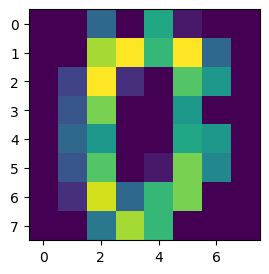

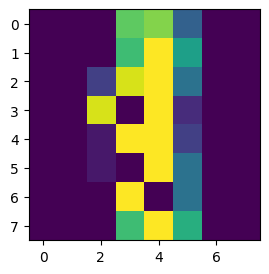

In [3]:
digits_matrix = datasets.load_digits().data
labels = datasets.load_digits().target
name = datasets.load_digits().target_names
k = 2

imgs_corrupted = data_corruption(1, digits_matrix[:k], None, 0.1)
for i in range(len(digits_matrix[:k])):
    plt.figure(figsize=(3,3))
    plt.imshow(imgs_corrupted[i].reshape(8,8))
    plt.show()

In [15]:
digits_matrix = datasets.load_digits().data
labels = datasets.load_digits().target
name = datasets.load_digits().target_names

k=20
labels_corrupted = data_corruption(3, digits_matrix[:k], labels[:k], 0.9)
print(labels_corrupted)
print(labels[:20])

[2 0 2 7 8 1 7 1 5 6 5 9 2 1 0 3 3 1 4 3]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
